#LAB 7: CycleGAN

<h4><div style="text-align: right"> Due date: 23:59 Dec 9, 2025.  </div> <br>
<div style="text-align: right"> Please upload your file and final-report at PLATO before the class in the form of [ID_Name_Lab7.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span>
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[202355514] [강지원]</span> </h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvf /content/drive/MyDrive/lab7.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
edges2shoes/train/train/5681_AB.jpg
edges2shoes/train/train/5682_AB.jpg
edges2shoes/train/train/5683_AB.jpg
edges2shoes/train/train/5684_AB.jpg
edges2shoes/train/train/5685_AB.jpg
edges2shoes/train/train/5686_AB.jpg
edges2shoes/train/train/5687_AB.jpg
edges2shoes/train/train/5688_AB.jpg
edges2shoes/train/train/5689_AB.jpg
edges2shoes/train/train/568_AB.jpg
edges2shoes/train/train/5690_AB.jpg
edges2shoes/train/train/5691_AB.jpg
edges2shoes/train/train/5692_AB.jpg
edges2shoes/train/train/5693_AB.jpg
edges2shoes/train/train/5694_AB.jpg
edges2shoes/train/train/5695_AB.jpg
edges2shoes/train/train/5696_AB.jpg
edges2shoes/train/train/5697_AB.jpg
edges2shoes/train/train/5698_AB.jpg
edges2shoes/train/train/5699_AB.jpg
edges2shoes/train/train/569_AB.jpg
edges2shoes/train/train/56_AB.jpg
edges2shoes/train/train/5700_AB.jpg
edges2shoes/train/train/5701_AB.jpg
edges2shoes/train/train/5702_AB.jpg
edges2shoes/train/train/5703_AB.jpg
edges2shoes/train/train/5704_AB.

In [3]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2025-12-03 10:46:41.066233


## 1. Implementation for CycleGAN
>
>
> <img src="https://drive.google.com/uc?id=1F12jzfLYThE_Ci-zJ7T761-tq1fGlv3H" alt="no_image" style="width: 800px;"/><br>
>
> * Cycle GAN leverages a cycle consistency in image-to-image translation
> * Unlike a conditional GAN, the cycle GAN considers <U>unpaired training data</U>
>
> **1. Dataset**
>
>   * MNIST dataset
>   * SVHN dataset
>   * Note that the MNIST data is gray, where the number of the channel is 1
>
> **2. Network architecture**
>
>   * **Overall architecture**
>
> <img src="https://drive.google.com/uc?id=1rJyEJOmSeboOsKyFPPoanvkaaiOpXNNA" alt="no_image" style="width: 600px;"/><br>
>
>   * **Generative model G**
>     * Xavier initialization (Glorot & Bengio [3])
>       * It makes sure the weights to keep the propagation in a reasonable range through many layers
>       * $V(W)= {2 \over n_{in}+n_{out}}$
>       * Use <code>nn.init.xavier_uniform_</code> for the Xavier initialization
>
>     * The generative model has three components:
>       1. Encoder:
>         * Convolutional network for feature extracting
>         * 2 convolutional layers and 2 LeakyReLU activations
>         * The output channel sizes are 64, 128 respectively<br>
>         * The kernel size of the convolutional layers are 7 and 3, respectively<br>
>            (You can use different sizes whatever you want, but we recommend those sizes)
>         * All the strides are 2
>         * Use batch normalization except for the first layer
>
>       2. Transformer:
>         * Learn how it would like to transform the feature vector of and image from A to B. <br>
>         * Use the resnet blok which contains the skip-connetction between the input and output for transformation<br>
>            (Please refer to <U>He et al.</U>[3])
>         * 3 resnet block layers and each of layer is followed by LeakyReLU activation
>         * All the output channel sizes are 128
>         * All the kernel sizes and strides are 3 and 1, respectively
>      
>       3. Decoder:
>         * Upconvolutional network for reconstructing an image
>         * 2 upconvolutional layers, one LeakyReLU activations, and one Tanh activation which is for the last layer
>         * The output channel sizes are 128, 64, and 3, respectively for the SVHN data, and 128, 64, and 1, respectively for the MNIST data <br>
>         * All the kernel sizes and strides are 4 and 2, respectively
>         * Use batch normalization except for the last layers
>
>
>
> <img src="https://drive.google.com/uc?id=1bsBowFWGDacoQBUZk-Lzh412IlEUZfmO" alt="no_image" style="width: 800px;"/><br>
>
>
>   * **Discriminative model D**
>     * Xavier Initialization
>     * It contains 4 convolutional layers, 3 LeakyReLU activations, and one Sigmoid activation which is for the last layer
>     * The output channel sizes are 64, 128, 256, and 1, respectively
>     * All the kernel sizes are 4 except for the last kernel size which is 1
>     * The strides from the first two layers are 2 and the rest of them are 1
>     * Use batch normalization([4]) except for the first and last layers
>
>
>
> <img src="https://drive.google.com/uc?id=1BWt04F4K7BSaAANlXvLG_4Jg1Eyk8zsT" alt="no_image" style="width: 600px;"/><br>
>
>
> **3. Loss function**<br>
> (In the paper, the authors use the L2 loss for the GAN loss, but the binary cross entropy loss also works well)
>  * **Discriminative model $D_X$ and $D_Y$**
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(y_i))+(1-l_i^{real})log(1-D_Y(y_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_Y(G_Y(x_i)))+(1-l_i^{fake})log(1-D_Y(G_Y(x_i)))$ <br>
>
>  *
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(x_i))+(1-l_i^{real})log(1-D_X(x_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_X(G_X(y_i)))+(1-l_i^{fake})log(1-D_X(G_X(y_i)))$ <br>
>
>    ($l_i^{real}=1, l_i^{fake}=0$) <br>
>    ($G_Y$ is the generator where $x_i$ translate to $y_i$ and vice versa)
>
>
>  * **Generative model $G_X$ and $G_Y$**<br>
>
>      * Binary cross entropy loss for the real data (It is actually fake)
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(G_X(y_i)))+(1-l_i^{real})log(1-D_X(G_X(y_i))) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(G_Y(x_i)))+(1-l_i^{real})log(1-D_Y(G_Y(x_i))) $ <br>
>
>    ($l_i^{real}=1$)
>    
>      * The cycle loss for measuring difference between $x_i$ and $G_Y(G_X(x_i))$ and vice versa
>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_Y(G_X(y_i))-y_i \rvert\rvert_1$ <br>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_X(G_Y(x_i))-x_i \rvert\rvert_1$

## 2. Cycle GAN with Pytorch

In [4]:
import os
import os.path as osp
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Parameter Setting
* You can adjust the parameters to yourself

In [5]:
print('STEP 0: PARAMETER SETTING')

# Data root directory
train_X_root = 'datasets/lab7/mnist/'
train_Y_root = 'datasets/lab7/svhn/'

# Weight save directory
vis_num = 2
save_dir = 'cyclegan'
if not osp.exists(save_dir):
    os.makedirs(save_dir)

# Batch size during training
bs = 64

# Size of image
img_height = 32
img_width = 32
img_size = 32
img_channel = 3

# Channels of generator feature
gfc = 64

# Channels of discriminator feature
dfc = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizing
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

STEP 0: PARAMETER SETTING


In [6]:
print('STEP 1: LOADING DATASET')

transform_1ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

transform_3ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_X_set = dset.MNIST(root=train_X_root,
                         train=True,
                         transform=transform_1ch,
                         download=True)
train_Y_set = dset.SVHN(root=train_Y_root,
                        split='train',
                        transform=transform_3ch,
                        download=True)
test_X_set = dset.MNIST(root=train_X_root,
                         train=False,
                         transform=transform_1ch,
                         download=True)
test_Y_set = dset.SVHN(root=train_Y_root,
                        split='test',
                        transform=transform_3ch,
                        download=True)

STEP 1: LOADING DATASET


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]
100%|██████████| 182M/182M [00:03<00:00, 60.1MB/s]
100%|██████████| 64.3M/64.3M [00:01<00:00, 47.7MB/s]


In [7]:
print('STEP 2: MAKING DATASET ITERABLE')

train_X_loader = torch.utils.data.DataLoader(train_X_set,
                                             batch_size=bs,
                                             shuffle=True,
                                             drop_last=True)

train_Y_loader = torch.utils.data.DataLoader(train_Y_set,
                                             batch_size=bs,
                                             shuffle=True,
                                             drop_last=True)

test_X_loader = torch.utils.data.DataLoader(test_X_set,
                                             batch_size=bs,
                                             shuffle=False,
                                             drop_last=True)

test_Y_loader = torch.utils.data.DataLoader(test_Y_set,
                                             batch_size=bs,
                                             shuffle=False,
                                             drop_last=True)

STEP 2: MAKING DATASET ITERABLE


### Visualize a few images

In [8]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

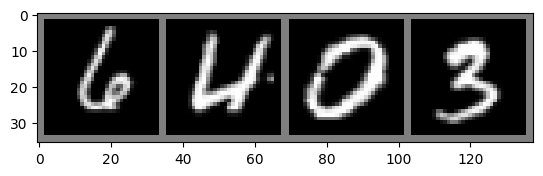

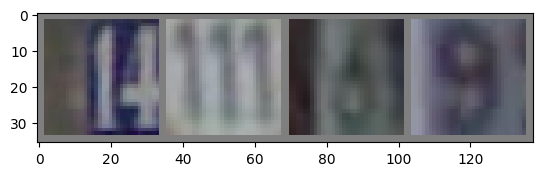

In [9]:
data_loader_X_sample = torch.utils.data.DataLoader(train_X_set,
                                                 batch_size=4,
                                                 shuffle=True)
data_loader_Y_sample = torch.utils.data.DataLoader(train_Y_set,
                                                 batch_size=4,
                                                 shuffle=True)

# Get a batch of training data
X = next(iter(data_loader_X_sample))
Y = next(iter(data_loader_Y_sample))

# Make a grid from batch
out_X = torchvision.utils.make_grid(X[0])
out_Y = torchvision.utils.make_grid(Y[0])

imshow(out_X)
imshow(out_Y)

### Utils
* Use the below code for the convolution or the upconvolution

### *References*
[1] Zhu et al., "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks", *ICCV*, 2017. <br>
[2] https://hardikbansal.github.io/CycleGANBlog/ <br>
[3] Glorot & Bengio, "Understanding the difficulty of training deep feedforward neural networks", *AISTATS* 2010. <br>
[4] Ioffe & Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", *ICML* 2015.

In [10]:
def conv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)

    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]

    return nn.Sequential(*layers)

def upconv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)

    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]

    return nn.Sequential(*layers)

def transpose(ndarray):
    return np.transpose(ndarray, [0,2,3,1])

def gray2rgb(ndarray):
    return np.concatenate((ndarray, ndarray, ndarray), axis=2)

### 2.1 Write the code (Generator) [3 points]
* You need to set the hyperparameters for implementing the upconvolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [76]:
print('STEP 3-1: CREATE MODEL CLASS (Generator)')


# [input channels, output channels, kernel_size, strides, paddings]

cfg_g_enc_X = [
    [1, 64, 7, 2, 3, 'LeakyReLU'],
    [64, 128, 3, 2, 1, 'LeakyReLU']
]

cfg_g_enc_Y = [
    [3, 64, 7, 2, 3, 'LeakyReLU'],
    [64, 128, 3, 2, 1, 'LeakyReLU']
]

cfg_g_trans = [
    [128, 128, 3, 1, 1, 'LeakyReLU'],
    [128, 128, 3, 1, 1, 'LeakyReLU'],
    [128, 128, 3, 1, 1, 'LeakyReLU']
]

cfg_g_dec_X = [
    [128, 64, 4, 2, 1, 'LeakyReLU'],
    [64, 3, 4, 2, 1, 'Tanh']
]

cfg_g_dec_Y = [
    [128, 64, 4, 2, 1, 'LeakyReLU'],
    [64, 1, 4, 2, 1, 'Tanh']
]

class ResNetBlock(nn.Module):
    def __init__(self, channels):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, 1, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(channels)
        self.relu = nn.LeakyReLU(0.2, inplace=True)
        self.conv2 = nn.Conv2d(channels, channels, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(channels)

        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.xavier_uniform_(self.conv2.weight)

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = self.relu(out)
        return out

class Generator_X(nn.Module):
    def __init__(self):
        super(Generator_X, self).__init__()

        #############
        # CODE HERE #
        #############

        self.enc1 = conv2d(cfg_g_enc_X[0], batch_norm=False)
        self.enc2 = conv2d(cfg_g_enc_X[1], batch_norm=True)

        self.trans1 = ResNetBlock(128)
        self.trans2 = ResNetBlock(128)
        self.trans3 = ResNetBlock(128)

        self.dec1 = upconv2d(cfg_g_dec_X[0], batch_norm=True)
        self.dec2 = upconv2d(cfg_g_dec_X[1], batch_norm=False)

    def forward(self, x):

        #############
        # CODE HERE #
        #############

        x = self.enc1(x)
        x = self.enc2(x)

        x = self.trans1(x)
        x = self.trans2(x)
        x = self.trans3(x)

        x = self.dec1(x)
        x = self.dec2(x)

        return x

class Generator_Y(nn.Module):
    def __init__(self):
        super(Generator_Y, self).__init__()

        #############
        # CODE HERE #
        #############
        self.enc1 = conv2d(cfg_g_enc_Y[0], batch_norm=False)
        self.enc2 = conv2d(cfg_g_enc_Y[1], batch_norm=True)

        self.trans1 = ResNetBlock(128)
        self.trans2 = ResNetBlock(128)
        self.trans3 = ResNetBlock(128)

        self.dec1 = upconv2d(cfg_g_dec_Y[0], batch_norm=True)
        self.dec2 = upconv2d(cfg_g_dec_Y[1], batch_norm=False)

    def forward(self, x):

        #############
        # CODE HERE #
        #############

        x = self.enc1(x)
        x = self.enc2(x)

        x = self.trans1(x)
        x = self.trans2(x)
        x = self.trans3(x)

        x = self.dec1(x)
        x = self.dec2(x)

        return x


STEP 3-1: CREATE MODEL CLASS (Generator)


### 2.2 Write the code (Discriminator) [3 points]
* You need to set the hyperparameters for implementing the convolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [77]:
print('STEP 3-2: CREATE MODEL CLASS (Discriminator)')


# [input channels, output channels, kernel_size, strides, paddings]

cfg_d_X = [
    [1, 64, 4, 2, 1, 'LeakyReLU'],
    [64, 128, 4, 2, 1, 'LeakyReLU'],
    [128, 256, 4, 1, 2, 'LeakyReLU'],
    [256, 1, 1, 1, 0, 'Sigmoid']
]

cfg_d_Y = [
    [3, 64, 4, 2, 1, 'LeakyReLU'],
    [64, 128, 4, 2, 1, 'LeakyReLU'],
    [128, 256, 4, 1, 1, 'LeakyReLU'],
    [256, 1, 4, 1, 0, 'Sigmoid']
]


class Discriminator_X(nn.Module):
    def __init__(self):
        super(Discriminator_X, self).__init__()

        #############
        # CODE HERE #
        #############
        self.conv1 = conv2d(cfg_d_X[0], batch_norm=False)
        self.conv2 = conv2d(cfg_d_X[1], batch_norm=True)
        self.conv3 = conv2d(cfg_d_X[2], batch_norm=True)
        self.conv4 = conv2d(cfg_d_X[3], batch_norm=False)

    def forward(self, x):

        #############
        # CODE HERE #
        #############
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)

        return x

class Discriminator_Y(nn.Module):
    def __init__(self):
        super(Discriminator_Y, self).__init__()

        #############
        # CODE HERE #
        #############
        self.conv1 = conv2d(cfg_d_Y[0], batch_norm=False)
        self.conv2 = conv2d(cfg_d_Y[1], batch_norm=True)
        self.conv3 = conv2d(cfg_d_Y[2], batch_norm=True)
        self.conv4 = conv2d(cfg_d_Y[3], batch_norm=False)

    def forward(self, x):

        #############
        # CODE HERE #
        #############
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)

        return x


STEP 3-2: CREATE MODEL CLASS (Discriminator)


In [78]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model_G_X = Generator_X()
model_G_Y = Generator_Y()
model_D_X = Discriminator_X()
model_D_Y = Discriminator_Y()


#######################
#  USE GPU FOR MODEL  #
#######################


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G_X.to(device)
print(model_G_X)
model_G_Y.to(device)
print(model_G_Y)
model_D_X.to(device)
print(model_D_X)
model_D_Y.to(device)

STEP 4: INSTANTIATE MODEL CLASS
Generator_X(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (trans1): ResNetBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (trans2): ResNetBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), str

Discriminator_Y(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): Sigmoid()
  )
)

In [79]:
print('STEP 5: INSTANTIATE LOSS CLASS')

criterion_GAN = nn.BCELoss()
criterion_L1 = nn.L1Loss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')

optimizer_G_X = torch.optim.Adam(model_G_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_G_Y = torch.optim.Adam(model_G_Y.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_X = torch.optim.Adam(model_D_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_Y = torch.optim.Adam(model_D_Y.parameters(), lr=lr, betas=(beta1, 0.999))

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS


### 2.3 Train the Cycle GAN [4 points]
* After the training is finished, check out the generated samples
* If the samples are generated well, then you will get the full score
* 1.2GB of GPU memory
* 10~20 mins of training
* Output samples
<img src="https://drive.google.com/uc?id=1PAmQ4XGHH6w24KrFvNOmUER2SAhKp_xN" alt="no_image" style="width: 600px;"/><br>

STEP 7: TRAIN THE MODEL
it[0100/4685] 	Loss_D:2.3438 	Loss_G:1.8542 	Loss_C:0.2694 	elapsed_time:0.13mins
it[0200/4685] 	Loss_D:2.1918 	Loss_G:2.2410 	Loss_C:0.2279 	elapsed_time:0.27mins
it[0300/4685] 	Loss_D:2.0050 	Loss_G:2.6581 	Loss_C:0.2178 	elapsed_time:0.40mins
it[0400/4685] 	Loss_D:1.8504 	Loss_G:3.0920 	Loss_C:0.2194 	elapsed_time:0.53mins
it[0500/4685] 	Loss_D:1.9243 	Loss_G:2.7814 	Loss_C:0.2159 	elapsed_time:0.67mins
it[0600/4685] 	Loss_D:1.6008 	Loss_G:3.5299 	Loss_C:0.2213 	elapsed_time:0.80mins
it[0700/4685] 	Loss_D:2.8948 	Loss_G:3.7544 	Loss_C:0.2343 	elapsed_time:0.95mins
it[0800/4685] 	Loss_D:1.7171 	Loss_G:3.4233 	Loss_C:0.2151 	elapsed_time:1.10mins
it[0900/4685] 	Loss_D:1.9342 	Loss_G:3.8244 	Loss_C:0.2647 	elapsed_time:1.23mins
it[1000/4685] 	Loss_D:1.9982 	Loss_G:4.5000 	Loss_C:0.2251 	elapsed_time:1.37mins


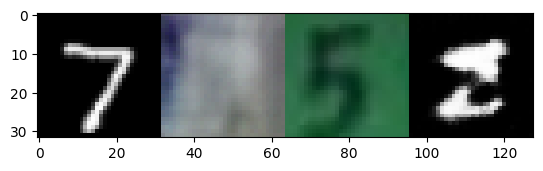

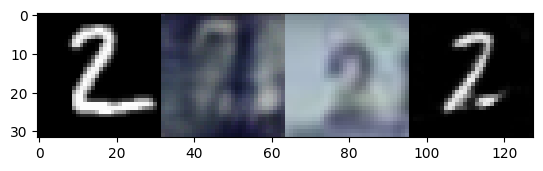

it[1100/4685] 	Loss_D:1.5969 	Loss_G:4.1622 	Loss_C:0.2409 	elapsed_time:1.55mins
it[1200/4685] 	Loss_D:1.9410 	Loss_G:4.2664 	Loss_C:0.2335 	elapsed_time:1.68mins
it[1300/4685] 	Loss_D:1.7929 	Loss_G:3.5184 	Loss_C:0.2448 	elapsed_time:1.82mins
it[1400/4685] 	Loss_D:1.6111 	Loss_G:3.9272 	Loss_C:0.2364 	elapsed_time:1.95mins
it[1500/4685] 	Loss_D:1.6143 	Loss_G:3.3311 	Loss_C:0.2421 	elapsed_time:2.09mins
it[1600/4685] 	Loss_D:1.4429 	Loss_G:4.1609 	Loss_C:0.2305 	elapsed_time:2.22mins
it[1700/4685] 	Loss_D:1.6952 	Loss_G:3.6239 	Loss_C:0.2340 	elapsed_time:2.36mins
it[1800/4685] 	Loss_D:1.6919 	Loss_G:4.1436 	Loss_C:0.2308 	elapsed_time:2.49mins
it[1900/4685] 	Loss_D:2.3517 	Loss_G:5.6204 	Loss_C:0.2442 	elapsed_time:2.63mins
it[2000/4685] 	Loss_D:1.6375 	Loss_G:3.4592 	Loss_C:0.2237 	elapsed_time:2.76mins


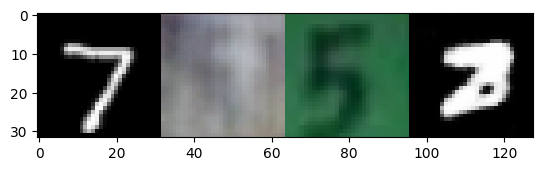

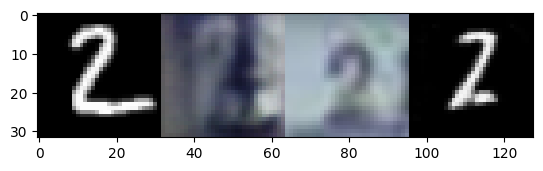

it[2100/4685] 	Loss_D:1.8586 	Loss_G:3.3144 	Loss_C:0.2377 	elapsed_time:2.94mins
it[2200/4685] 	Loss_D:1.8364 	Loss_G:3.1005 	Loss_C:0.2163 	elapsed_time:3.08mins
it[2300/4685] 	Loss_D:1.9281 	Loss_G:3.5508 	Loss_C:0.2323 	elapsed_time:3.21mins
it[2400/4685] 	Loss_D:2.1331 	Loss_G:2.3851 	Loss_C:0.2350 	elapsed_time:3.35mins
it[2500/4685] 	Loss_D:1.8809 	Loss_G:3.3891 	Loss_C:0.2376 	elapsed_time:3.48mins
it[2600/4685] 	Loss_D:1.5728 	Loss_G:4.4485 	Loss_C:0.2346 	elapsed_time:3.62mins
it[2700/4685] 	Loss_D:2.3103 	Loss_G:4.7977 	Loss_C:0.2266 	elapsed_time:3.76mins
it[2800/4685] 	Loss_D:1.7369 	Loss_G:3.5489 	Loss_C:0.2308 	elapsed_time:3.89mins
it[2900/4685] 	Loss_D:1.7973 	Loss_G:4.1548 	Loss_C:0.2634 	elapsed_time:4.02mins
it[3000/4685] 	Loss_D:1.6953 	Loss_G:3.1795 	Loss_C:0.2228 	elapsed_time:4.16mins


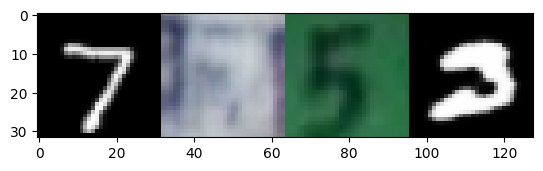

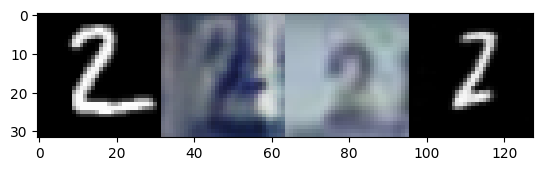

it[3100/4685] 	Loss_D:1.6313 	Loss_G:3.4035 	Loss_C:0.2326 	elapsed_time:4.34mins
it[3200/4685] 	Loss_D:1.7188 	Loss_G:3.3476 	Loss_C:0.2256 	elapsed_time:4.48mins
it[3300/4685] 	Loss_D:2.8512 	Loss_G:7.9216 	Loss_C:0.2193 	elapsed_time:4.61mins
it[3400/4685] 	Loss_D:1.8515 	Loss_G:2.7696 	Loss_C:0.2166 	elapsed_time:4.75mins
it[3500/4685] 	Loss_D:2.0421 	Loss_G:2.3120 	Loss_C:0.2096 	elapsed_time:4.88mins
it[3600/4685] 	Loss_D:1.6137 	Loss_G:3.5171 	Loss_C:0.2412 	elapsed_time:5.02mins
it[3700/4685] 	Loss_D:1.6470 	Loss_G:3.8514 	Loss_C:0.2379 	elapsed_time:5.15mins
it[3800/4685] 	Loss_D:2.4473 	Loss_G:3.5045 	Loss_C:0.2287 	elapsed_time:5.29mins
it[3900/4685] 	Loss_D:1.6831 	Loss_G:3.9532 	Loss_C:0.2258 	elapsed_time:5.42mins
it[4000/4685] 	Loss_D:1.8676 	Loss_G:3.3774 	Loss_C:0.2356 	elapsed_time:5.56mins


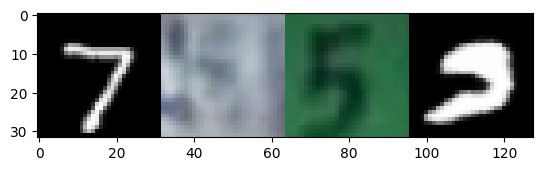

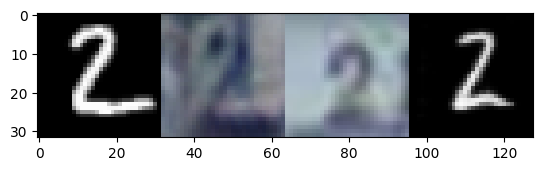

it[4100/4685] 	Loss_D:1.6756 	Loss_G:2.8275 	Loss_C:0.2353 	elapsed_time:5.74mins
it[4200/4685] 	Loss_D:1.9607 	Loss_G:3.4946 	Loss_C:0.2486 	elapsed_time:5.87mins
it[4300/4685] 	Loss_D:1.7514 	Loss_G:2.8943 	Loss_C:0.2209 	elapsed_time:6.01mins
it[4400/4685] 	Loss_D:1.7830 	Loss_G:3.5938 	Loss_C:0.2552 	elapsed_time:6.15mins
it[4500/4685] 	Loss_D:1.7371 	Loss_G:3.5428 	Loss_C:0.2387 	elapsed_time:6.28mins
it[4600/4685] 	Loss_D:1.7150 	Loss_G:3.4364 	Loss_C:0.2261 	elapsed_time:6.42mins


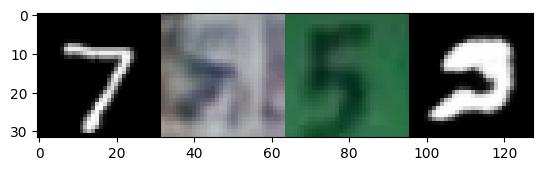

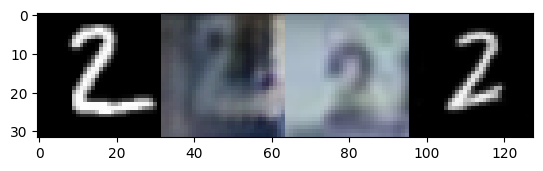

In [80]:
print('STEP 7: TRAIN THE MODEL')

label_real = torch.full((bs, 1, 8, 8), real_label, dtype=torch.float32, device=device)
label_fake = torch.full((bs, 1, 8, 8), fake_label, dtype=torch.float32, device=device)

num_iter = 0
max_iter = num_epochs*len(train_X_loader)

train_start_time = time.time()
for epoch in range(1, num_epochs+1):
    for batch_index, data_X in enumerate(train_X_loader):
        model_G_X.train()
        model_G_Y.train()
        model_D_X.train()
        model_D_Y.train()

        data_X = data_X[0].to(device)
        data_Y = next(iter(train_Y_loader))[0].to(device)

        ### Update discriminator model

        #############
        # CODE HERE #
        #############

        if batch_index == 0 and epoch == 1:
            with torch.no_grad():
                pred_shape_X = model_D_X(data_X).shape
                label_real_X = torch.full((bs, 1, pred_shape_X[2], pred_shape_X[3]), real_label, dtype=torch.float32, device=device)
                label_fake_X = torch.full((bs, 1, pred_shape_X[2], pred_shape_X[3]), fake_label, dtype=torch.float32, device=device)

                pred_shape_Y = model_D_Y(data_Y).shape
                label_real_Y = torch.full((bs, 1, pred_shape_Y[2], pred_shape_Y[3]), real_label, dtype=torch.float32, device=device)
                label_fake_Y = torch.full((bs, 1, pred_shape_Y[2], pred_shape_Y[3]), fake_label, dtype=torch.float32, device=device)

        optimizer_D_X.zero_grad()
        pred_real_X = model_D_X(data_X)
        loss_D_X_real = criterion_GAN(pred_real_X, label_real_X)

        fake_X = model_G_Y(data_Y)
        pred_fake_X = model_D_X(fake_X.detach())
        loss_D_X_fake = criterion_GAN(pred_fake_X, label_fake_X)

        loss_D_X = loss_D_X_real + loss_D_X_fake
        loss_D_X.backward()
        optimizer_D_X.step()

        optimizer_D_Y.zero_grad()
        pred_real_Y = model_D_Y(data_Y)
        loss_D_Y_real = criterion_GAN(pred_real_Y, label_real_Y)

        fake_Y = model_G_X(data_X)
        pred_fake_Y = model_D_Y(fake_Y.detach())
        loss_D_Y_fake = criterion_GAN(pred_fake_Y, label_fake_Y)

        loss_D_Y = loss_D_Y_real + loss_D_Y_fake
        loss_D_Y.backward()
        optimizer_D_Y.step()

        err_D = loss_D_X + loss_D_Y

        ### Update generator model

        #############
        # CODE HERE #
        #############
        optimizer_G_X.zero_grad()
        optimizer_G_Y.zero_grad()

        fake_X = model_G_Y(data_Y)
        fake_Y = model_G_X(data_X)
        pred_fake_X = model_D_X(fake_X)
        pred_fake_Y = model_D_Y(fake_Y)
        loss_G_Y = criterion_GAN(pred_fake_X, label_real_X)
        loss_G_X = criterion_GAN(pred_fake_Y, label_real_Y)

        reconstructed_X = model_G_Y(fake_Y)
        reconstructed_Y = model_G_X(fake_X)
        loss_cycle_X = criterion_L1(reconstructed_X, data_X)
        loss_cycle_Y = criterion_L1(reconstructed_Y, data_Y)

        loss_cycle = loss_cycle_X + loss_cycle_Y
        loss_G = loss_G_X + loss_G_Y + 10 * loss_cycle

        loss_G.backward()
        optimizer_G_X.step()
        optimizer_G_Y.step()

        err_G = loss_G_X + loss_G_Y

        err_C = loss_cycle

        num_iter += 1
        # Output training stats
        if num_iter%100 == 0:
            print('it[{:04d}/{:04d}] \tLoss_D:{:.4f} \tLoss_G:{:.4f} \tLoss_C:{:.4f} \telapsed_time:{:.2f}mins'.format(
                num_iter, max_iter, err_D.item(), err_G.item(), err_C.item(), (time.time()-train_start_time)/60
            ))

        if num_iter%1000==0 or num_iter==max_iter:
            save_name = osp.join(save_dir, 'it{:04d}.pt'.format(num_iter))
            torch.save({
                'model_G_X': model_G_X.state_dict(),
                'model_G_Y': model_G_Y.state_dict()
            }, save_name)

            with torch.no_grad():
                model_G_X.eval()
                model_G_Y.eval()
                for test_index, data_X in enumerate(test_X_loader):
                    if test_index == 0:

                        data_X = data_X[0].to(device)
                        data_Y = next(iter(test_Y_loader))[0].to(device)

                        output_X = model_G_X(data_X)
                        output_Y = model_G_Y(data_Y)

                        data_X = ((data_X+1)/2).cpu().data.numpy()
                        data_Y = ((data_Y+1)/2).cpu().data.numpy()

                        output_X = ((output_X + 1)/2).cpu().data.numpy()
                        output_Y = ((output_Y + 1)/2).cpu().data.numpy()

                        for vis_idx in range(vis_num):
                            data_X_, data_Y_ = gray2rgb(transpose(data_X)[vis_idx]), transpose(data_Y)[vis_idx]
                            output_X_, output_Y_  = transpose(output_X)[vis_idx], gray2rgb(transpose(output_Y)[vis_idx])
                            outputs = np.concatenate((data_X_, output_X_, data_Y_, output_Y_), axis=1)
                            plt.imshow(outputs)
                            plt.pause(0.001)